In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

/tmp/ipykernel_20867/3418630466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan


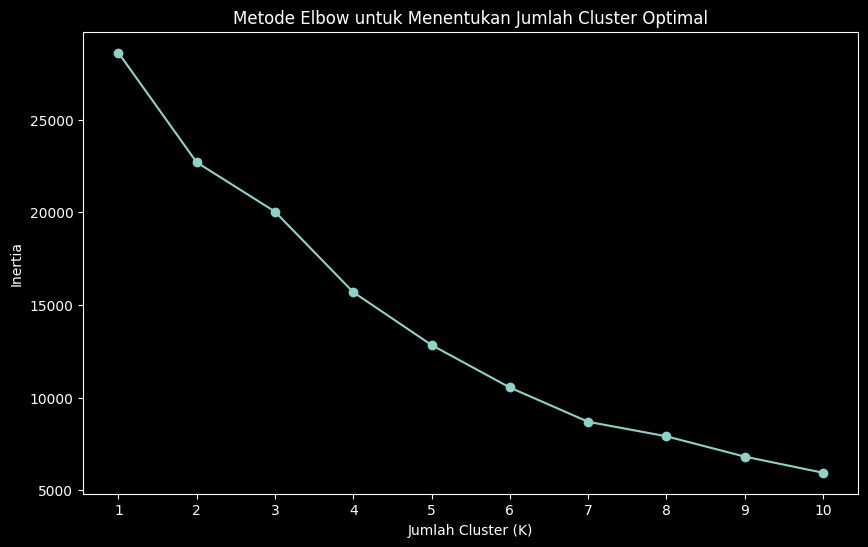

In [2]:


# Muat data penjualan
data = pd.read_csv('penjualan_sepatu_1.csv')

# Pilih fitur yang akan digunakan
fitur = ['countReview', 'discountPercentage', 'sold', 'originalPrice', 'price', 'ratingAverage']

# Pra-pemrosesan data
X = data[fitur]
X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi daftar inertia dan range nilai K
inertia = []
range_k = range(1, 11)  # Cobalah nilai K dari 1 hingga 10

# Lakukan K-means untuk setiap nilai K dan hitung inertia
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot nilai inertia vs. jumlah klaster (K)
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(range_k)
plt.show()


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Muat data penjualan
# data = pd.read_csv('data_penjualan.csv')

# Pilih fitur yang akan digunakan
fitur = ['countReview', 'discountPercentage', 'sold', 'originalPrice', 'price', 'ratingAverage']

# Pra-pemrosesan data
X = data[fitur]
X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah cluster yang diinginkan (K)
k = 3

# Terapkan K-means
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Tampilkan hasil klasterisasi
print(data['cluster'].value_counts())

# Evaluasi hasil klasterisasi (opsional)
# Metrik evaluasi seperti inertia, Silhouette score, atau Davies-Bouldin index dapat digunakan di sini


/tmp/ipykernel_20867/2169979333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan


cluster
0    3600
1    1083
2      87
Name: count, dtype: int64


/tmp/ipykernel_20867/833257969.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan


cluster
0    3600
1    1083
2      87
Name: count, dtype: int64


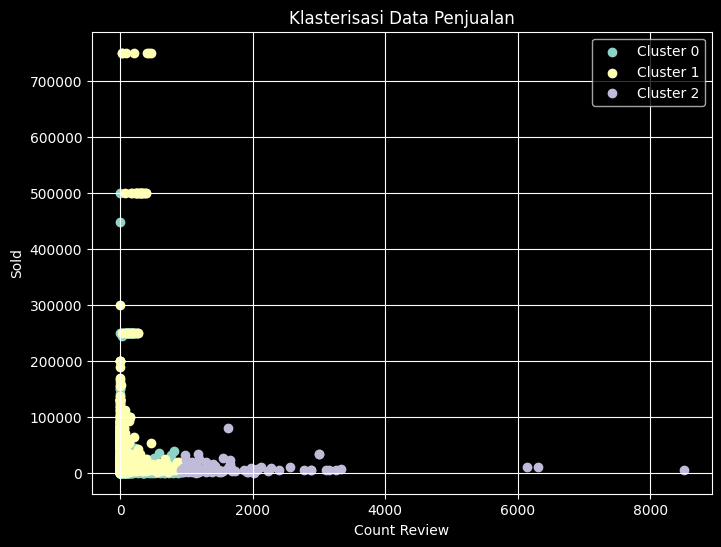

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membuat dataset hipotetis
# np.random.seed(42)
# data = pd.DataFrame({
#     'countReview': np.random.randint(1, 100, 100),
#     'discountPercentage': np.random.randint(0, 50, 100),
#     'sold': np.random.randint(50, 1000, 100),
#     'originalPrice': np.random.randint(10, 100, 100),
#     'price': np.random.randint(5, 90, 100),
#     'ratingAverage': np.random.uniform(1, 5, 100)
# })

# Pilih fitur yang akan digunakan
fitur = ['countReview', 'discountPercentage', 'sold', 'originalPrice', 'price', 'ratingAverage']

# Pra-pemrosesan data
X = data[fitur]
X.fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0, bisa disesuaikan dengan kebutuhan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah cluster yang diinginkan (K)
k = 3

# Terapkan K-means
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Tampilkan hasil klasterisasi
print(data['cluster'].value_counts())

# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['countReview'], cluster_data['sold'], label=f'Cluster {cluster}')

plt.title('Klasterisasi Data Penjualan')
plt.xlabel('Count Review')
plt.ylabel('Sold')
plt.legend()
plt.grid(True)
plt.show()
